# Data PreProcessing

## Importing Relevant Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing The Training DataSet

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating A Data Structure With 60 Timestamps And 1 Output

In [6]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
X_train.shape

(1198, 60)

## Reshaping

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [12]:
X_train.shape

(1198, 60, 1)

# Building The RNN

## Importing Relevant Libraries

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initialize The RNN

In [8]:
regressor = Sequential()

## Adding The First LSTM Layer And Some Dropout Regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## Adding The Second LSTM Layer And Some Dropout Regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding The Third LSTM Layer And Some Dropout Regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding The Fourth LSTM Layer And Some Dropout Regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

## Adding The Output Layer

In [13]:
regressor.add(Dense(units = 1))

## Compiling The RNN

In [14]:
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

## Fitting The RNN To The Training Set

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 85ms/step - loss: 0.0387
Epoch 2/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0068
Epoch 5/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0039
Epoch 13/100
38/38 [=

# Making The Predictions And Visualising The Results

## Getting The Real Stock Price Of 2017

In [14]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [16]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


## Getting The Predicted Stock Price Of 2017

In [18]:
dataset_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [19]:
dataset_test['Open']

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [30]:
len(dataset_total)

1278

In [31]:
len(dataset_test)

20

In [32]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs.shape

(80,)

In [34]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

(80, 1)

In [20]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i - 60 : i, 0])    
X_test= np.array(X_test)

In [21]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:
predicted_stock_price = regressor.predict(X_test)

In [23]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualising The Results

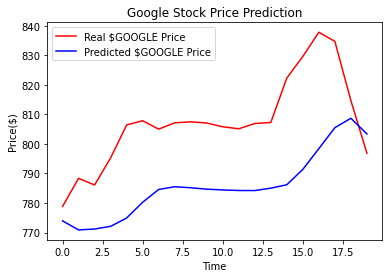

In [26]:
plt.plot(real_stock_price, color = 'red', label = 'Real $GOOGLE Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted $GOOGLE Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.legend()
plt.show()